In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# importing libraries
import warnings 
warnings.filterwarnings("ignore")
from sklearn.metrics import r2_score

In [2]:
file_path = r'C:\Users\revat\OneDrive\Machine_learning_research\bike_price_project\day.csv'
df_demand = pd.read_csv(file_path)
print(df_demand.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [3]:
df_demand

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [4]:
df_demand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
df_demand.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# drop unnecessary columns
df_demand.drop(columns = ['instant', 'dteday', 'casual', 'registered'], axis = 1, inplace = True)

In [7]:
df_demand

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095
727,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796


In [8]:
#check null values
df_demand.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [9]:
df_demand.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


In [10]:
##changing categorical data which were primarily numeric to more meaningful one
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'} 
weathersit_mapping = {1: 'Clear/Few clouds', 2: 'Mist/Cloudy', 3: 'Light Snow/Light Rain', 4: 'Heavy Rain/Ice Pallets/Fog'}
mnth_mapping = {1: 'jan', 2: 'feb', 3: 'mar', 4: 'apr', 5: 'may', 6: 'jun', 7: 'jul', 8: 'aug', 9: 'sept', 10: 'oct', 11: 'nov', 12: 'dec'}
weekday_mapping = {0: 'sun', 1: 'mon', 2: 'tue', 3: 'wed', 4: 'thu', 5: 'fri', 6: 'sat'}

# Apply correct mappings
df_demand['season'] = df_demand['season'].astype(int).map(season_mapping) 
df_demand['weathersit'] = df_demand['weathersit'].astype(int).map(weathersit_mapping)
df_demand['mnth'] = df_demand['mnth'].astype(int).map(mnth_mapping)  
df_demand['weekday'] = df_demand['weekday'].astype(int).map(weekday_mapping)

In [11]:
df_demand.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,jan,0,sat,0,Mist/Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,jan,0,sun,0,Mist/Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,jan,0,mon,1,Clear/Few clouds,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,jan,0,tue,1,Clear/Few clouds,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,jan,0,wed,1,Clear/Few clouds,9.305237,11.46350,43.6957,12.522300,1600


<Figure size 1500x3000 with 0 Axes>

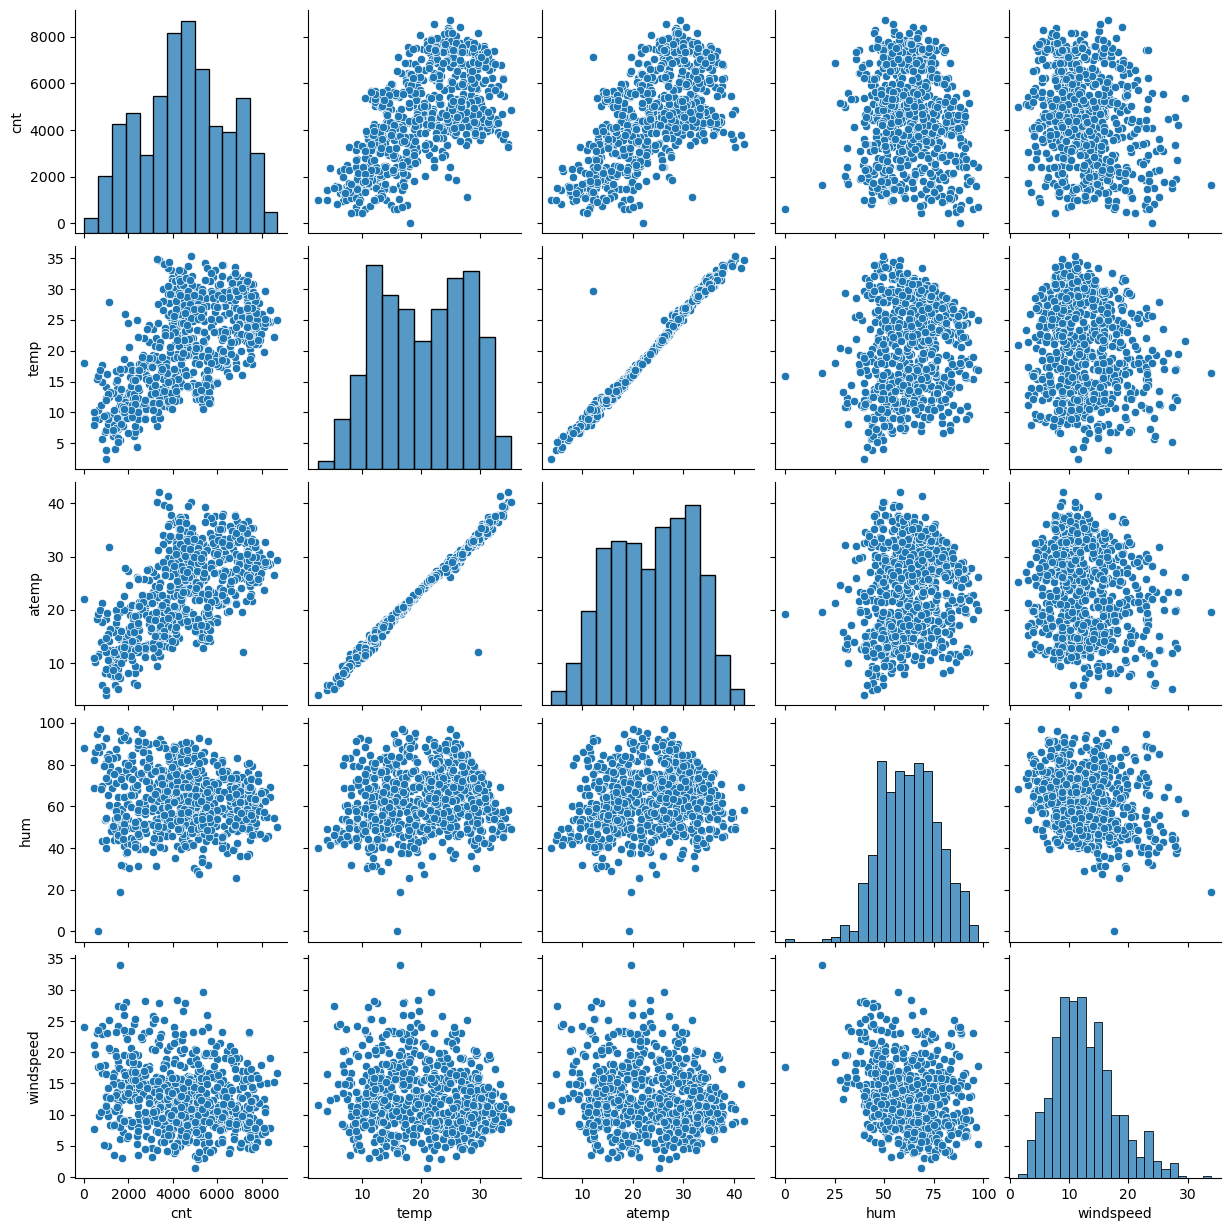

In [12]:
import seaborn as sns
plt.figure(figsize = (15,30))
sns.pairplot(data=df_demand,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

<Figure size 2000x1500 with 0 Axes>

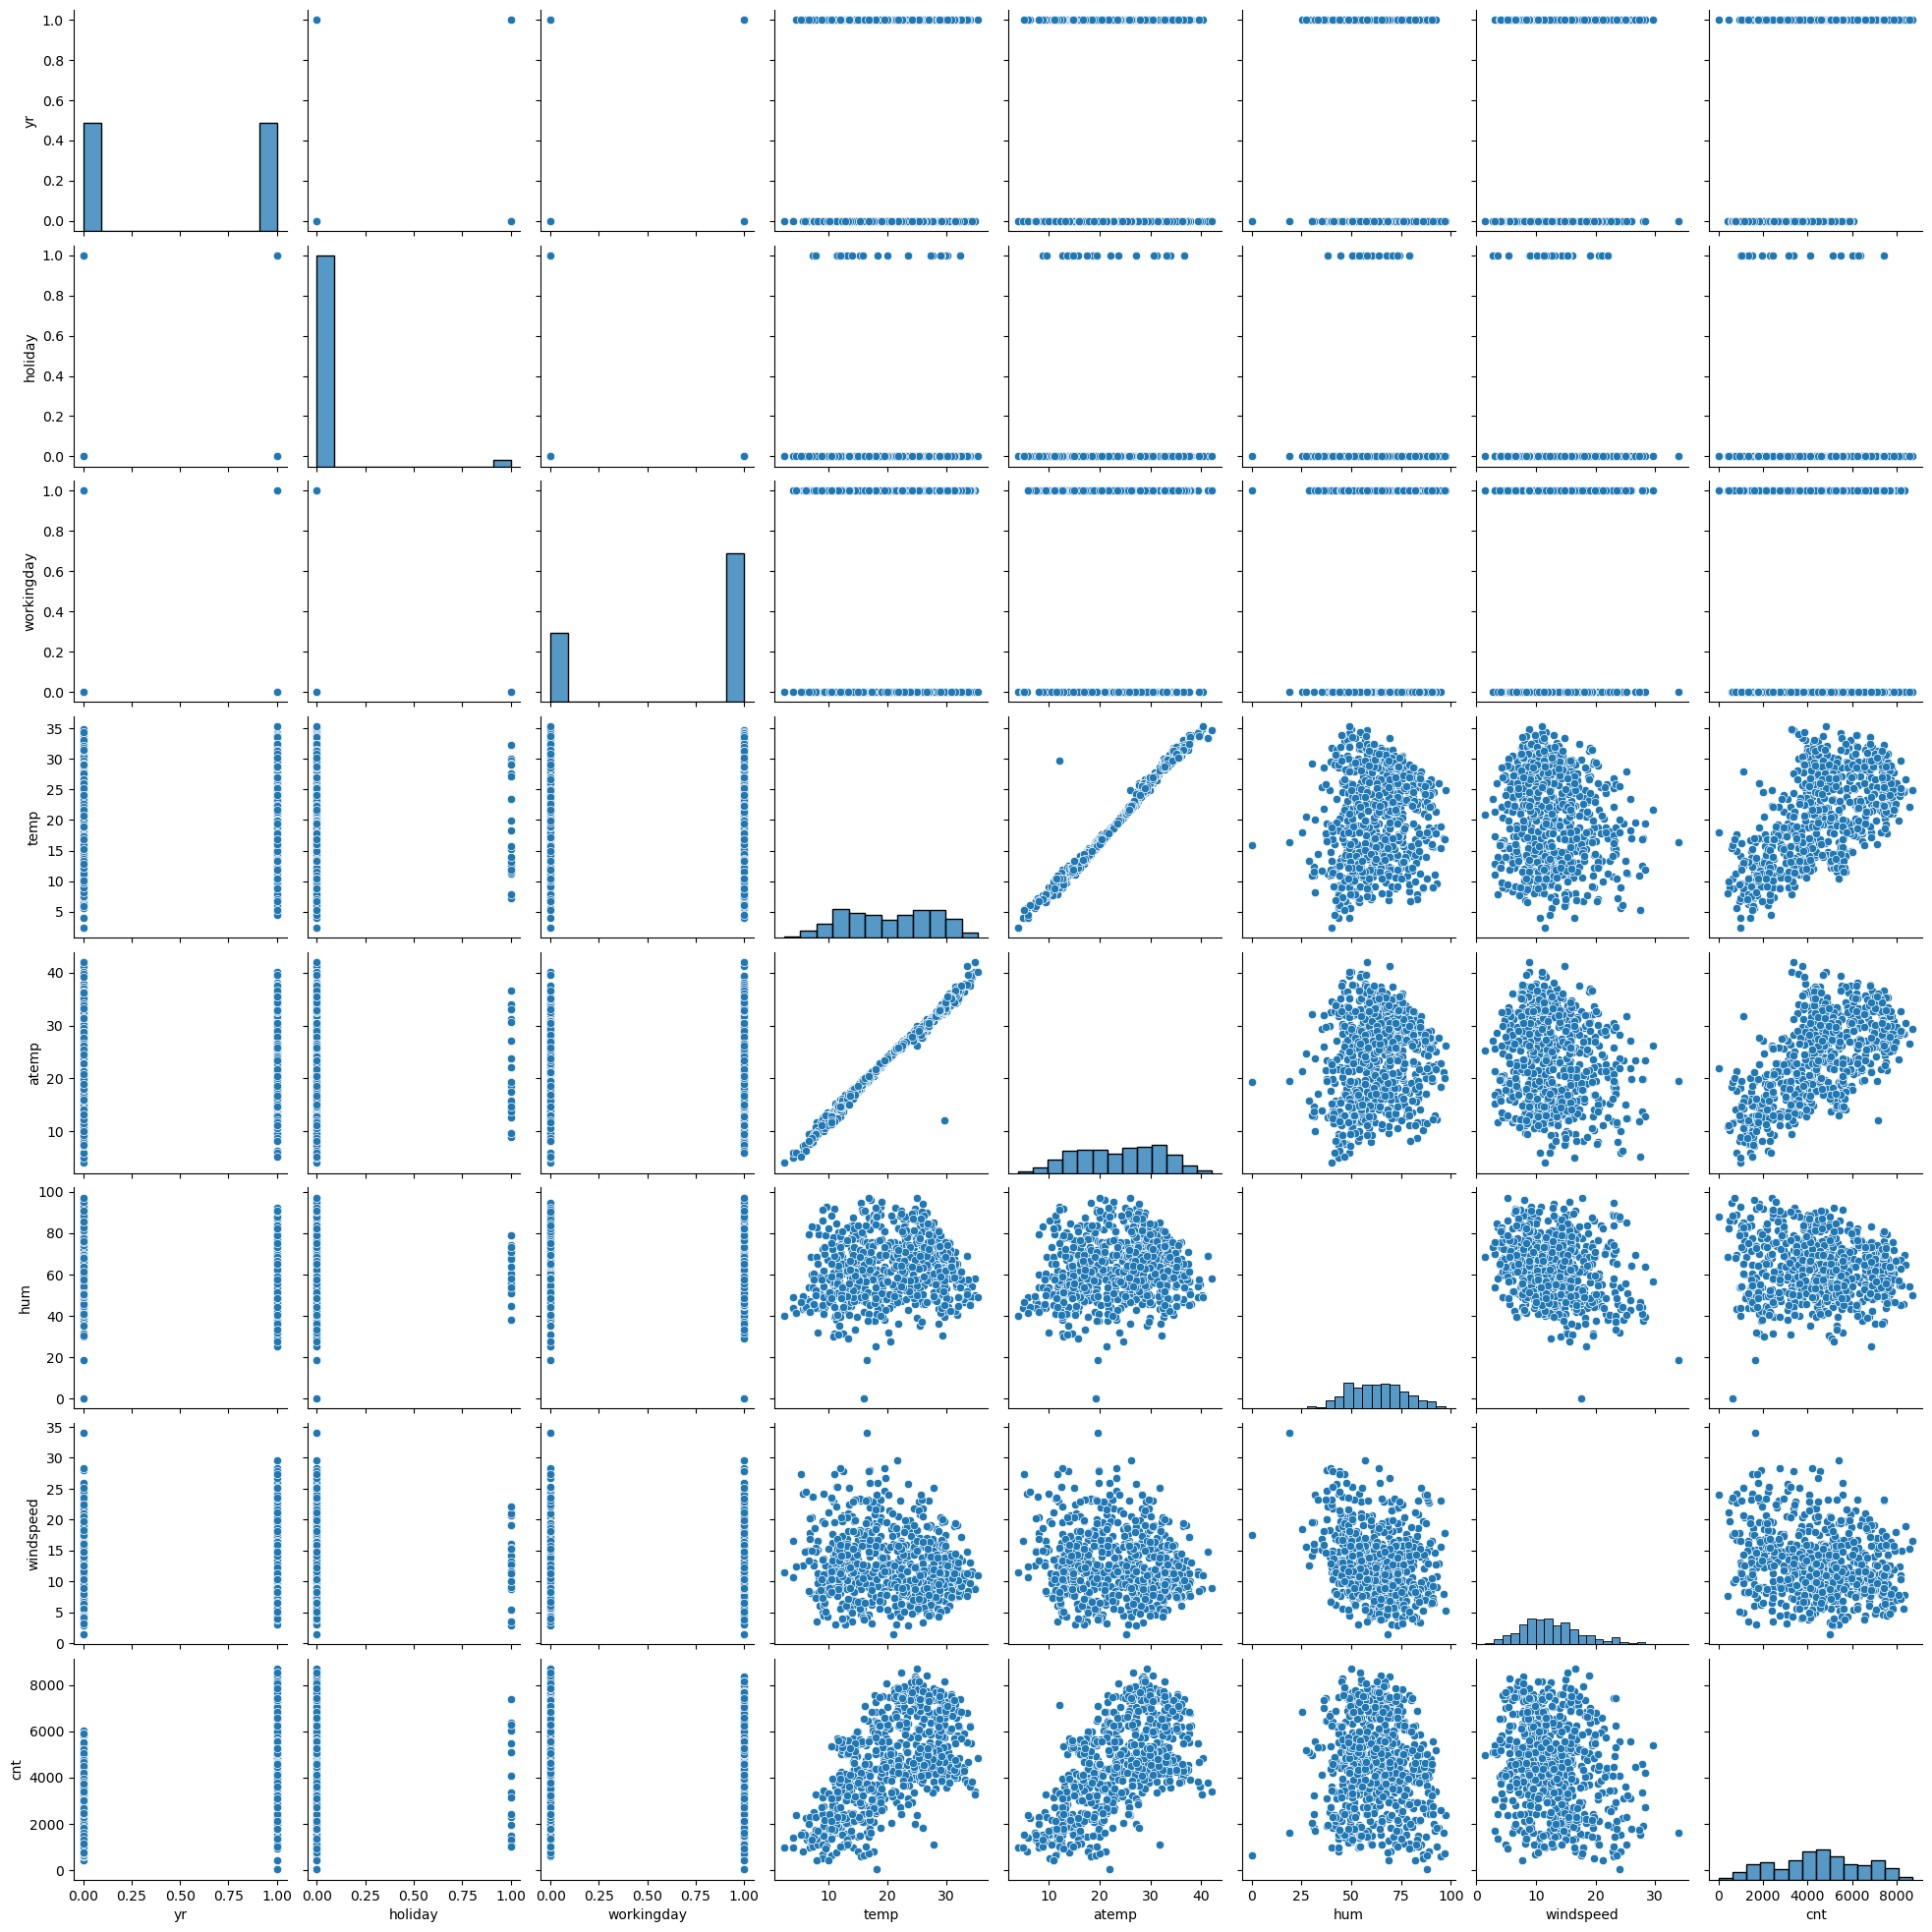

In [13]:
#visualization
plt.figure(figsize=(20,15))
import seaborn as sns
sns.pairplot(df_demand)

<Axes: xlabel='weathersit', ylabel='cnt'>

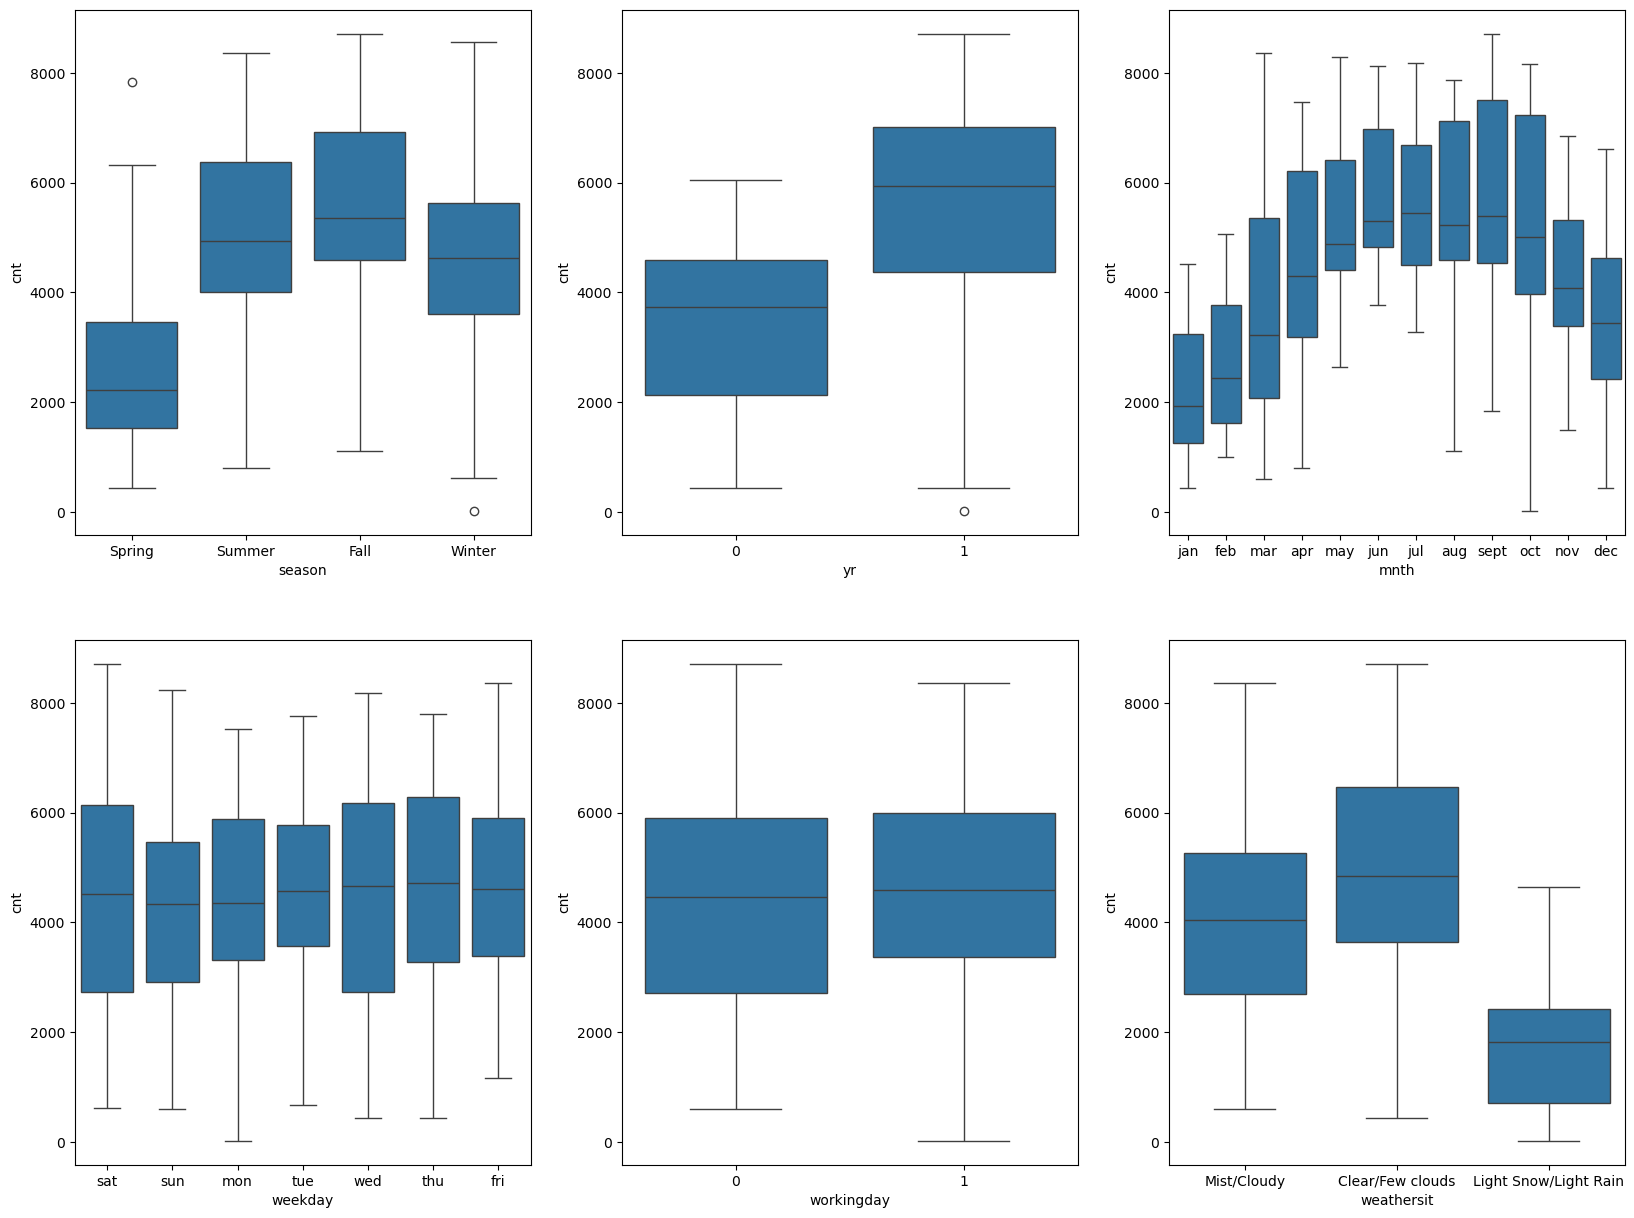

In [14]:
#visualising the categorical variables

plt.figure(figsize=(20,15))

plt.subplot(2,3,1)
sns.boxplot(x='season',y='cnt',data=df_demand)

plt.subplot(2,3,2)
sns.boxplot(x='yr',y='cnt',data=df_demand)

plt.subplot(2,3,3)
sns.boxplot(x='mnth',y='cnt',data=df_demand)

plt.subplot(2,3,4)
sns.boxplot(x='weekday',y='cnt',data=df_demand)

plt.subplot(2,3,5)
sns.boxplot(x='workingday',y='cnt',data=df_demand)

plt.subplot(2,3,6)
sns.boxplot(x='weathersit',y='cnt',data=df_demand)

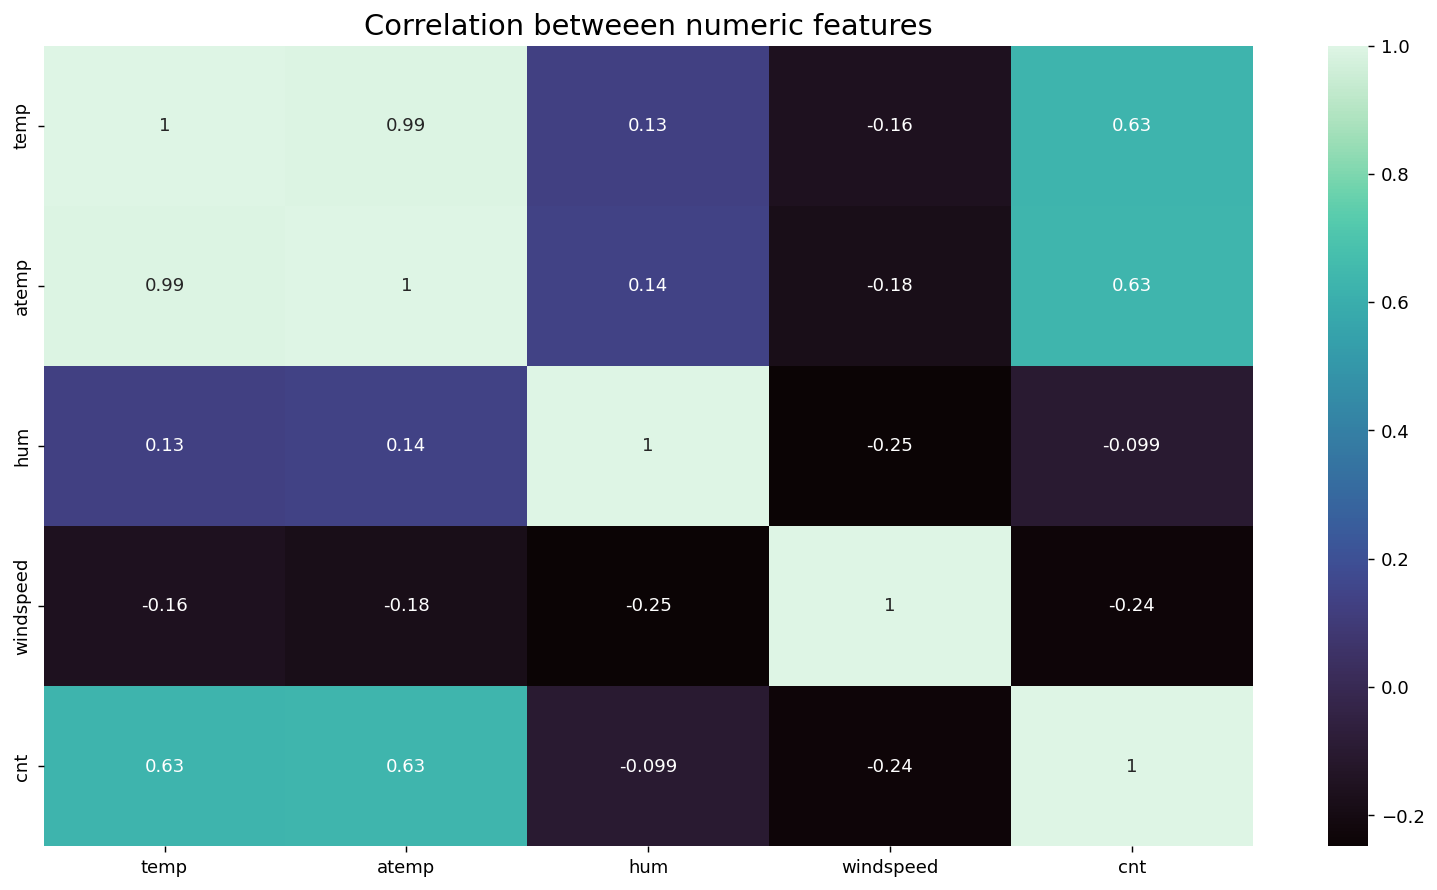

In [15]:
num_features = ["temp","atemp","hum","windspeed","cnt"]
plt.figure(figsize=(15,8),dpi=130)
plt.title("Correlation betweeen numeric features",fontsize=16)
sns.heatmap(df_demand[num_features].corr(),annot= True,cmap="mako")
plt.show()

In [16]:
#creating dummy variables
df_demand = pd.get_dummies(data=df_demand,columns=["season","mnth","weekday"],drop_first=True)
df_demand = pd.get_dummies(data=df_demand,columns=["weathersit"])
df_demand = df_demand.astype(int)

In [17]:
df_demand.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_Spring', 'season_Summer', 'season_Winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_Clear/Few clouds',
       'weathersit_Light Snow/Light Rain', 'weathersit_Mist/Cloudy'],
      dtype='object')

In [18]:
df_demand.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Clear/Few clouds,weathersit_Light Snow/Light Rain,weathersit_Mist/Cloudy
0,0,0,0,14,18,80,10,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14,17,69,16,801,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8,9,43,16,1349,1,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,1,8,10,59,10,1562,1,0,...,0,0,0,0,0,1,0,1,0,0
4,0,0,1,9,11,43,12,1600,1,0,...,0,0,0,0,0,0,1,1,0,0


In [19]:
df_demand.shape

(730, 31)

In [20]:
y=df_demand.pop('cnt')
X=df_demand

In [21]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=42)

In [22]:
X.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_Spring,season_Summer,season_Winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Clear/Few clouds,weathersit_Light Snow/Light Rain,weathersit_Mist/Cloudy
0,0,0,0,14,18,80,10,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14,17,69,16,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8,9,43,16,1,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,1,8,10,59,10,1,0,0,...,0,0,0,0,0,1,0,1,0,0
4,0,0,1,9,11,43,12,1,0,0,...,0,0,0,0,0,0,1,1,0,0


In [23]:
X_train.shape

(511, 30)

In [24]:
X_test.shape

(219, 30)

In [25]:
from sklearn.preprocessing import MinMaxScaler
num = ['temp','atemp','hum','windspeed']
scaler = MinMaxScaler()
X_train[num] = scaler.fit_transform(X_train[num])

In [26]:
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_Spring,season_Summer,season_Winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Clear/Few clouds,weathersit_Light Snow/Light Rain,weathersit_Mist/Cloudy
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.00000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.520548,0.027397,0.669276,0.546937,0.525817,0.649585,0.410959,0.230920,0.258317,0.250489,...,0.09002,0.148728,0.150685,0.152642,0.146771,0.131115,0.140900,0.624266,0.029354,0.346380
std,0.500067,0.163398,0.470935,0.226353,0.208184,0.143639,0.183832,0.421834,0.438138,0.433719,...,0.28649,0.356169,0.358092,0.359994,0.354224,0.337857,0.348259,0.484786,0.168963,0.476282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.363636,0.358974,0.536082,0.296296,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575758,0.564103,0.659794,0.370370,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.727273,0.692308,0.752577,0.518519,0.000000,1.000000,0.500000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_Spring,season_Summer,season_Winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Clear/Few clouds,weathersit_Light Snow/Light Rain,weathersit_Mist/Cloudy
683,1,0,1,0.333333,0.333333,0.639175,0.333333,0,0,1,...,0,0,0,0,1,0,0,0,0,1
645,1,1,0,0.393939,0.410256,0.721649,0.407407,0,0,1,...,0,1,0,0,0,0,0,0,0,1
163,0,0,1,0.727273,0.692308,0.505155,0.703704,0,1,0,...,0,1,0,0,0,0,0,1,0,0
360,0,0,1,0.333333,0.333333,0.783505,0.407407,1,0,0,...,0,0,0,0,0,1,0,0,0,1
640,1,0,1,0.727273,0.666667,0.814433,0.111111,0,0,1,...,0,0,0,0,0,0,1,0,0,1


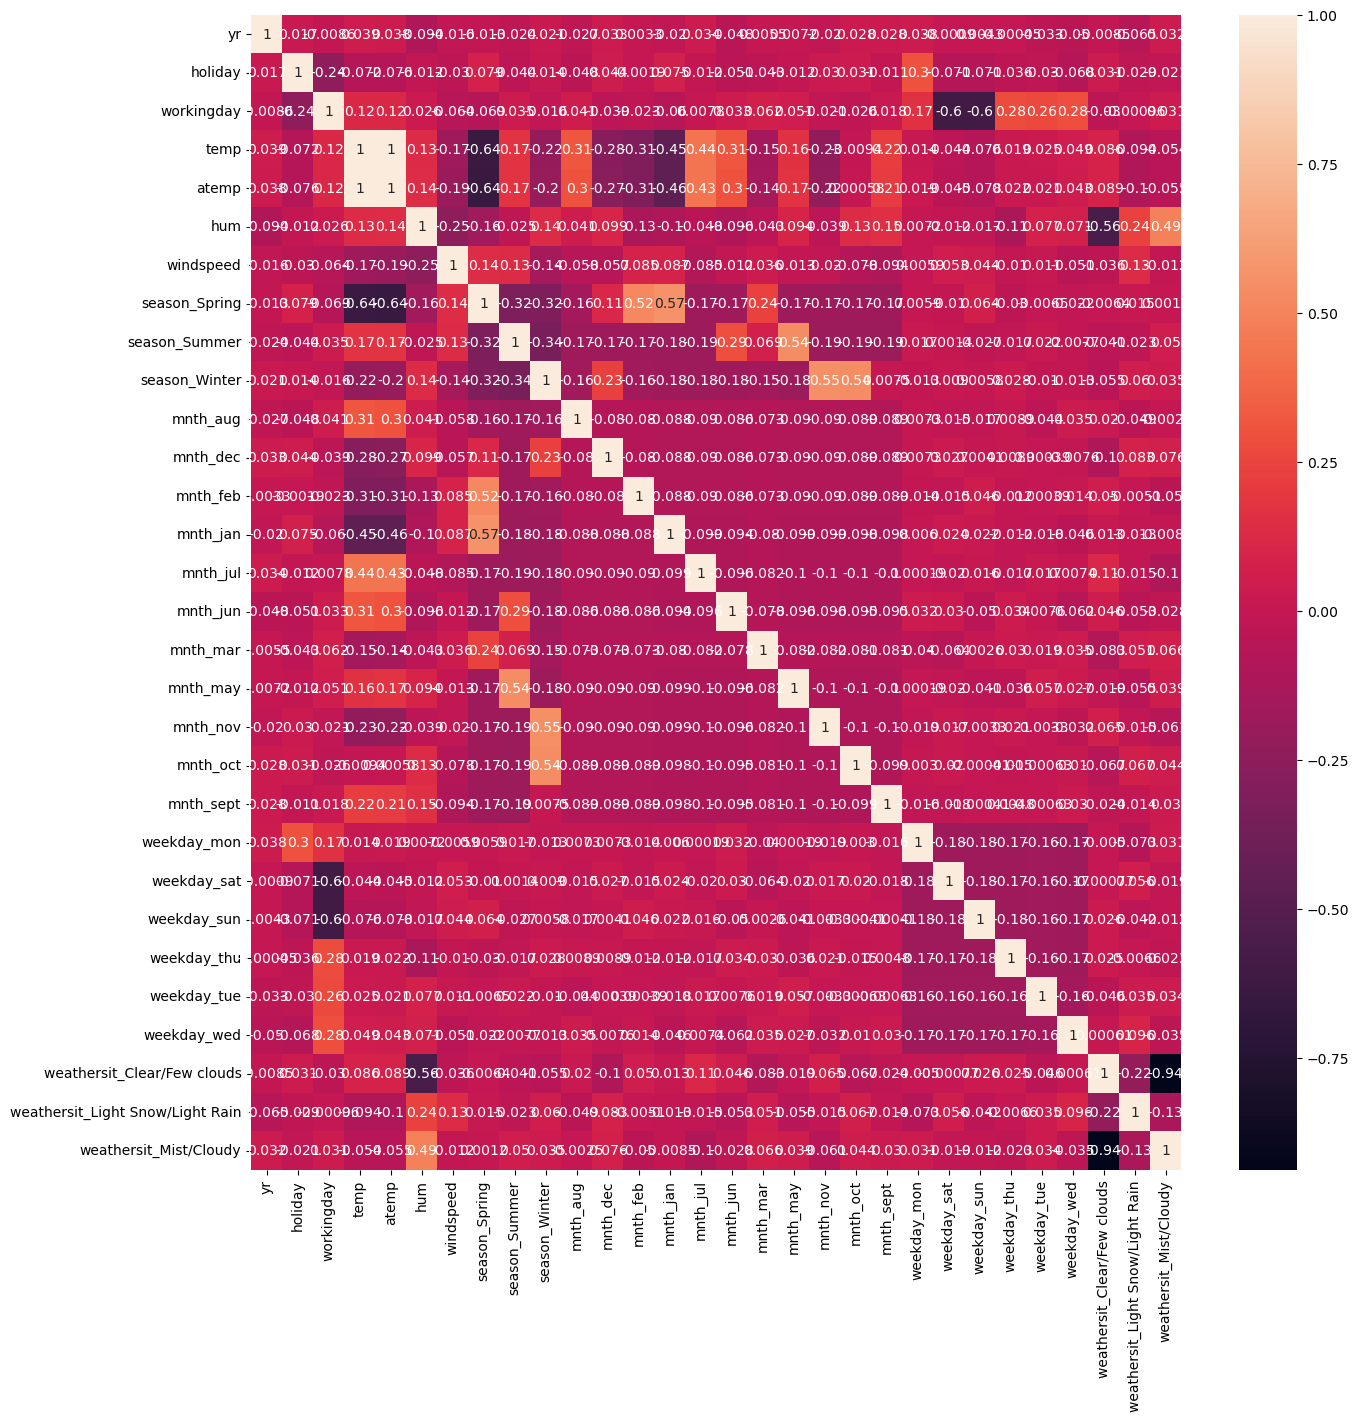

In [28]:
plt.figure(figsize = (15, 15))  #Checking if the variables are highly correlated
sns.heatmap(X_train.corr(), annot = True)
plt.show()

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [30]:
lr = LinearRegression()
rfe = RFE(lr, n_features_to_select=15)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [31]:
RFE(estimator=LinearRegression(), n_features_to_select=15)


RFE(estimator=LinearRegression(), n_features_to_select=15)

In [32]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 3),
 ('workingday', True, 1),
 ('temp', False, 5),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', False, 15),
 ('season_Winter', True, 1),
 ('mnth_aug', False, 9),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 13),
 ('mnth_jan', False, 14),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 16),
 ('mnth_mar', False, 2),
 ('mnth_may', False, 4),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 7),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 10),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 6),
 ('weekday_thu', False, 12),
 ('weekday_tue', False, 8),
 ('weekday_wed', False, 11),
 ('weathersit_Clear/Few clouds', True, 1),
 ('weathersit_Light Snow/Light Rain', True, 1),
 ('weathersit_Mist/Cloudy', True, 1)]

In [33]:
rfe_features = X_train.columns[rfe.support_]
rfe_features

Index(['yr', 'workingday', 'atemp', 'hum', 'windspeed', 'season_Spring',
       'season_Winter', 'mnth_dec', 'mnth_jul', 'mnth_nov', 'mnth_sept',
       'weekday_sat', 'weathersit_Clear/Few clouds',
       'weathersit_Light Snow/Light Rain', 'weathersit_Mist/Cloudy'],
      dtype='object')

In [34]:
X_train = X_train[rfe_features]
X_train.shape

(511, 15)

Training a model-1 using statsmodels considering top 15 features based on RFE

In [36]:
X_train

,yr,workingday,atemp,hum,windspeed,season_Spring,season_Winter,mnth_dec,mnth_jul,mnth_nov,mnth_sept,weekday_sat,weathersit_Clear/Few clouds,weathersit_Light Snow/Light Rain,weathersit_Mist/Cloudy
683,1,1,0.333333,0.639175,0.333333,0,1,0,0,1,0,0,0,0,1
645,1,0,0.410256,0.721649,0.407407,0,1,0,0,0,0,0,0,0,1
163,0,1,0.692308,0.505155,0.703704,0,0,0,0,0,0,0,1,0,0
360,0,1,0.333333,0.783505,0.407407,1,0,1,0,0,0,0,0,0,1
640,1,1,0.666667,0.814433,0.111111,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0,0,0.410256,0.536082,0.629630,1,0,0,0,0,0,0,1,0,0
106,0,0,0.487179,0.484536,0.703704,0,0,0,0,0,0,0,1,0,0
270,0,1,0.641026,0.865979,0.296296,0,1,0,0,0,1,0,0,0,1
435,1,1,0.487179,0.494845,0.444444,1,0,0,0,0,0,0,1,0,0


In [37]:
#  adding constant to input
import statsmodels.api as sm
train_model1 = sm.add_constant(X_train)
train_model1.sample()

,const,yr,workingday,atemp,hum,windspeed,season_Spring,season_Winter,mnth_dec,mnth_jul,mnth_nov,mnth_sept,weekday_sat,weathersit_Clear/Few clouds,weathersit_Light Snow/Light Rain,weathersit_Mist/Cloudy
722,1.0,1,1,0.230769,0.814433,0.148148,1,0,1,0,0,0,0,0,0,1


In [38]:
model1 = sm.OLS(y_train,train_model1).fit()
# getting summary of model1 
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     187.1
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          1.48e-187
Time:                        23:17:40   Log-Likelihood:                -4123.1
No. Observations:                 511   AIC:                             8276.
Df Residuals:                     496   BIC:                             8340.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                             1587.4892    262.280      6.053      0.000    1072.172    2102.807
yr                                1970.6124     70.572     27.923      0.000    1831.955    2109.270
workingday                         383.0868     93.338      4.104      0.000     199.700     566.474
atemp                             3869.2130    315.709     12.256      0.000    3248.921    4489.504
hum                              -1384.6692    331.500     -4.177      0.000   -2035.988    -733.351
windspeed                         -917.9600    208.750     -4.397      0.000   -1328.103    -507.817
season_Spring                    -1267.4553    139.144     -9.109      0.000   -1540.840    -994.070
season_Winter                      728.8322    118.401      6.156      0.000     496.204     961.461
mnth_dec                          -566.5853    149.224     -3.797      0.000    -859.775    -273.396
mnth_jul                          -475.9072    139.891     -3.402      0.001    -750.759    -201.056
mnth_nov                          -717.1630    157.432     -4.555      0.000   -1026.478    -407.848
mnth_sept                          461.4732    128.815      3.582      0.000     208.382     714.564
weekday_sat                        428.5060    121.952      3.514      0.000     188.901     668.111
weathersit_Clear/Few clouds       1296.2474     89.883     14.421      0.000    1119.648    1472.846
weathersit_Light Snow/Light Rain  -540.2417    199.533     -2.708      0.007    -932.277    -148.207
weathersit_Mist/Cloudy             831.4834    110.581      7.519      0.000     614.219    1048.748
==============================================================================
Omnibus:                       73.947   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.833
Skew:                          -0.766   Prob(JB):                     8.02e-38
Kurtosis:                       5.383   Cond. No.                     9.36e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.94e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

we get R - squarred value - 84 % 

In [40]:
#  Create a Dataframe that will contain the names of all the features variables and their respective VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
12,weathersit_Clear/Few clouds,50.85
14,weathersit_Mist/Cloudy,34.85
13,weathersit_Light Snow/Light Rain,4.51
2,atemp,3.58
5,season_Spring,2.86
6,season_Winter,2.19
3,hum,1.88
9,mnth_nov,1.72
1,workingday,1.60
11,weekday_sat,1.58


we are getting VIF and p_value both high for atemp - so we will not proceed with atemp.

In [42]:
X_train = X_train.drop(['atemp'],axis=1)

Model 2

In [44]:
#  adding constant to input
train_model2 = sm.add_constant(X_train)
train_model2.sample()

,const,yr,workingday,hum,windspeed,season_Spring,season_Winter,mnth_dec,mnth_jul,mnth_nov,mnth_sept,weekday_sat,weathersit_Clear/Few clouds,weathersit_Light Snow/Light Rain,weathersit_Mist/Cloudy
484,1.0,1,1,0.587629,0.37037,0,0,0,0,0,0,0,0,0,1


In [45]:
model2 = sm.OLS(y_train,train_model2).fit()
# getting summary of model2 
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     146.1
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          2.61e-160
Time:                        23:17:40   Log-Likelihood:                -4190.7
No. Observations:                 511   AIC:                             8409.
Df Residuals:                     497   BIC:                             8469.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                             2967.0750    270.124     10.984      0.000    2436.350    3497.800
yr                                2026.6324     80.302     25.238      0.000    1868.859    2184.405
workingday                         484.5164    106.011      4.570      0.000     276.231     692.801
hum                               -619.9533    371.242     -1.670      0.096   -1349.350     109.443
windspeed                        -1239.8910    236.138     -5.251      0.000   -1703.842    -775.940
season_Spring                    -2515.0688    108.164    -23.252      0.000   -2727.583   -2302.555
season_Winter                      241.3489    127.161      1.898      0.058      -8.491     491.189
mnth_dec                          -959.2878    166.186     -5.772      0.000   -1285.802    -632.774
mnth_jul                           180.0262    147.376      1.222      0.222    -109.531     469.584
mnth_nov                         -1201.8166    173.758     -6.917      0.000   -1543.208    -860.426
mnth_sept                          641.2344    145.928      4.394      0.000     354.522     927.947
weekday_sat                        445.1239    139.048      3.201      0.001     171.929     718.319
weathersit_Clear/Few clouds       1970.2271     81.069     24.303      0.000    1810.947    2129.507
weathersit_Light Snow/Light Rain  -329.6531    226.676     -1.454      0.146    -775.014     115.707
weathersit_Mist/Cloudy            1326.5010    117.379     11.301      0.000    1095.881    1557.121
==============================================================================
Omnibus:                       62.563   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.553
Skew:                          -0.655   Prob(JB):                     4.08e-32
Kurtosis:                       5.252   Cond. No.                     7.84e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.54e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [46]:
#  Create a Dataframe that will contain the names of all the features variables and their respective VIF

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
11,weathersit_Clear/Few clouds,36.29
13,weathersit_Mist/Cloudy,28.11
12,weathersit_Light Snow/Light Rain,4.10
5,season_Winter,1.94
2,hum,1.81
8,mnth_nov,1.61
1,workingday,1.59
10,weekday_sat,1.58
4,season_Spring,1.33
6,mnth_dec,1.21


In [47]:
X_train = X_train.drop(['hum'],axis=1)

Model 3

In [49]:
#  adding constant to input
train_model3 = sm.add_constant(X_train)
train_model3.sample()

,const,yr,workingday,windspeed,season_Spring,season_Winter,mnth_dec,mnth_jul,mnth_nov,mnth_sept,weekday_sat,weathersit_Clear/Few clouds,weathersit_Light Snow/Light Rain,weathersit_Mist/Cloudy
458,1.0,1,1,0.407407,0,0,0,0,0,0,0,1,0,0


In [50]:
model3 = sm.OLS(y_train,train_model3).fit()
# getting summary of model3 
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     157.5
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          8.11e-161
Time:                        23:17:40   Log-Likelihood:                -4192.2
No. Observations:                 511   AIC:                             8410.
Df Residuals:                     498   BIC:                             8465.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                             2575.7986    134.659     19.128      0.000    2311.230    2840.367
yr                                2044.3923     79.737     25.639      0.000    1887.729    2201.055
workingday                         490.4543    106.141      4.621      0.000     281.914     698.995
windspeed                        -1115.2299    224.430     -4.969      0.000   -1556.176    -674.284
season_Spring                    -2490.3340    107.337    -23.201      0.000   -2701.223   -2279.445
season_Winter                      233.1593    127.295      1.832      0.068     -16.942     483.260
mnth_dec                          -968.9078    166.384     -5.823      0.000   -1295.809    -642.006
mnth_jul                           183.9383    147.622      1.246      0.213    -106.101     473.977
mnth_nov                         -1189.1984    173.905     -6.838      0.000   -1530.877    -847.520
mnth_sept                          610.4316    145.017      4.209      0.000     325.510     895.353
weekday_sat                        451.5649    139.244      3.243      0.001     177.986     725.144
weathersit_Clear/Few clouds       1930.3982     77.620     24.870      0.000    1777.895    2082.902
weathersit_Light Snow/Light Rain  -544.3022    187.044     -2.910      0.004    -911.794    -176.810
weathersit_Mist/Cloudy            1189.7027     84.218     14.127      0.000    1024.237    1355.168
==============================================================================
Omnibus:                       62.393   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.423
Skew:                          -0.653   Prob(JB):                     4.35e-32
Kurtosis:                       5.253   Cond. No.                     8.46e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.89e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [51]:
#  Create a Dataframe that will contain the names of all the features variables and their respective VIF

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
10,weathersit_Clear/Few clouds,9.70
12,weathersit_Mist/Cloudy,5.98
4,season_Winter,1.94
11,weathersit_Light Snow/Light Rain,1.63
7,mnth_nov,1.61
1,workingday,1.59
9,weekday_sat,1.58
3,season_Spring,1.30
5,mnth_dec,1.21
6,mnth_jul,1.16


In [52]:
X_train = X_train.drop(['windspeed'],axis=1)

Model 4

In [54]:
#  adding constant to input
train_model4 = sm.add_constant(X_train)
train_model4.sample()

,const,yr,workingday,season_Spring,season_Winter,mnth_dec,mnth_jul,mnth_nov,mnth_sept,weekday_sat,weathersit_Clear/Few clouds,weathersit_Light Snow/Light Rain,weathersit_Mist/Cloudy
670,1.0,1,1,0,1,0,0,1,0,0,1,0,0


In [55]:
model4 = sm.OLS(y_train,train_model4).fit()
# getting summary of model1 
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     161.9
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          9.98e-157
Time:                        23:17:40   Log-Likelihood:                -4204.5
No. Observations:                 511   AIC:                             8433.
Df Residuals:                     499   BIC:                             8484.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                             2162.3497    108.363     19.955      0.000    1949.446    2375.253
yr                                2041.8331     81.607     25.020      0.000    1881.498    2202.168
workingday                         514.0073    108.524      4.736      0.000     300.788     727.227
season_Spring                    -2520.7155    109.677    -22.983      0.000   -2736.201   -2305.230
season_Winter                      314.0672    129.212      2.431      0.015      60.201     567.933
mnth_dec                          -928.4435    170.084     -5.459      0.000   -1262.613    -594.274
mnth_jul                           261.2463    150.245      1.739      0.083     -33.944     556.436
mnth_nov                         -1233.5590    177.751     -6.940      0.000   -1582.792    -884.326
mnth_sept                          674.0395    147.841      4.559      0.000     383.572     964.507
weekday_sat                        445.4416    142.506      3.126      0.002     165.456     725.427
weathersit_Clear/Few clouds       1854.3224     77.881     23.810      0.000    1701.307    2007.338
weathersit_Light Snow/Light Rain  -799.6793    184.065     -4.345      0.000   -1161.317    -438.041
weathersit_Mist/Cloudy            1107.7065     84.523     13.105      0.000     941.641    1273.772
==============================================================================
Omnibus:                       68.589   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.014
Skew:                          -0.687   Prob(JB):                     4.44e-38
Kurtosis:                       5.488   Cond. No.                     6.53e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.97e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [56]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
9,weathersit_Clear/Few clouds,5.84
11,weathersit_Mist/Cloudy,3.79
3,season_Winter,1.91
6,mnth_nov,1.60
1,workingday,1.58
8,weekday_sat,1.58
2,season_Spring,1.30
10,weathersit_Light Snow/Light Rain,1.29
4,mnth_dec,1.21
5,mnth_jul,1.15


In [57]:
X_train.columns

Index(['yr', 'workingday', 'season_Spring', 'season_Winter', 'mnth_dec',
       'mnth_jul', 'mnth_nov', 'mnth_sept', 'weekday_sat',
       'weathersit_Clear/Few clouds', 'weathersit_Light Snow/Light Rain',
       'weathersit_Mist/Cloudy'],
      dtype='object')

In [58]:
list(zip(X_train.columns,model4.params))

[('yr', 2162.3497318246687),
 ('workingday', 2041.833088554545),
 ('season_Spring', 514.0073451799547),
 ('season_Winter', -2520.7154861442013),
 ('mnth_dec', 314.0671991405694),
 ('mnth_jul', -928.4434962564258),
 ('mnth_nov', 261.2462614747156),
 ('mnth_sept', -1233.5589899890754),
 ('weekday_sat', 674.0394857201647),
 ('weathersit_Clear/Few clouds', 445.4416143494451),
 ('weathersit_Light Snow/Light Rain', 1854.3224483353351),
 ('weathersit_Mist/Cloudy', -799.6792565362111)]

In [59]:
X_train

,yr,workingday,season_Spring,season_Winter,mnth_dec,mnth_jul,mnth_nov,mnth_sept,weekday_sat,weathersit_Clear/Few clouds,weathersit_Light Snow/Light Rain,weathersit_Mist/Cloudy
683,1,1,0,1,0,0,1,0,0,0,0,1
645,1,0,0,1,0,0,0,0,0,0,0,1
163,0,1,0,0,0,0,0,0,0,1,0,0
360,0,1,1,0,1,0,0,0,0,0,0,1
640,1,1,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
71,0,0,1,0,0,0,0,0,0,1,0,0
106,0,0,0,0,0,0,0,0,0,1,0,0
270,0,1,0,1,0,0,0,1,0,0,0,1
435,1,1,1,0,0,0,0,0,0,1,0,0


In [60]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [61]:
lr.intercept_

-8.744946249492696e+16

In [62]:
lr.coef_

array([ 2.05475487e+03,  5.22860104e+02, -2.52620047e+03,  2.89621170e+02,
       -8.97695279e+02,  2.31247922e+02, -1.23918123e+03,  6.76748790e+02,
        4.44091361e+02,  8.74494625e+16,  8.74494625e+16,  8.74494625e+16])

In [63]:
X_train.columns

Index(['yr', 'workingday', 'season_Spring', 'season_Winter', 'mnth_dec',
       'mnth_jul', 'mnth_nov', 'mnth_sept', 'weekday_sat',
       'weathersit_Clear/Few clouds', 'weathersit_Light Snow/Light Rain',
       'weathersit_Mist/Cloudy'],
      dtype='object')

Validate the model on the training dataset

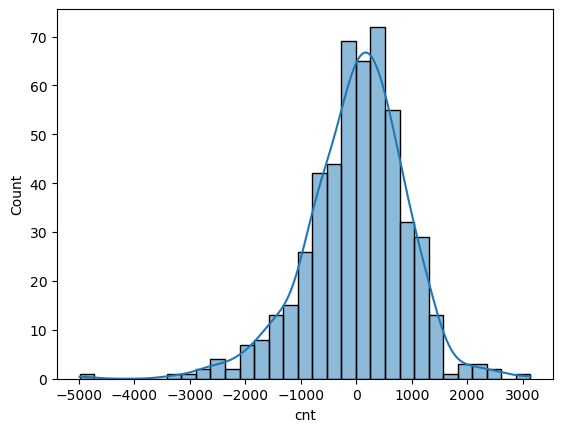

In [66]:
predictions = lr.predict(X_train)

# Calculate the residuals (difference between actual and predicted)
residuals = y_train - predictions

# Plot the residuals using a histogram with KDE
sns.histplot(residuals, kde=True)
plt.show()

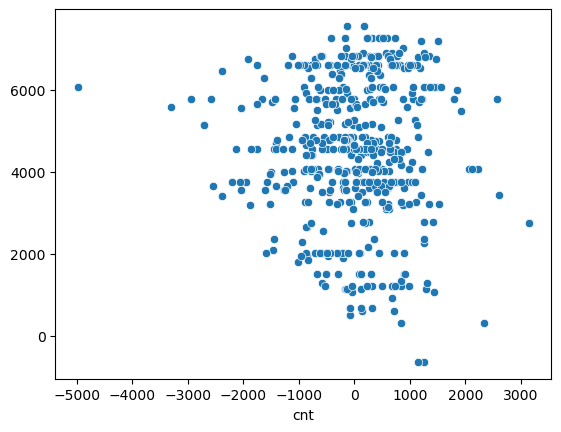

In [70]:
sns.scatterplot(x= residuals,y=predictions)
plt.show()

Predictions and Evaluation on Test Data

In [78]:
selected_features = ['yr', 'workingday', 'season_Spring', 'season_Winter', 'mnth_dec',
       'mnth_jul', 'mnth_nov', 'mnth_sept', 'weekday_sat',
       'weathersit_Clear/Few clouds', 'weathersit_Light Snow/Light Rain',
       'weathersit_Mist/Cloudy']
X_test = X_test[selected_features]
X_test.shape

(219, 12)

KeyError: "['cnt'] not found in axis"